### Boston House Data, Massachusetts eyaletinin Boston şehrinde bulunan konutların fiyatlarını tahmin etmek için tasarlanmış bir veri setidir. 
### Veri seti, 1970'li yıllarda Massachusetts Ulaştırma Departmanı tarafından toplanmıştır. Veri seti, 506 gözlem ve 14 değişkenden oluşur.

#

#### --- CRIM: Sehirdeki kisi basina suc orani
#### --- ZN: Imarli arazi orani 25.000 (fit^2 basina)
#### --- INDUS: Kasaba basina perakende olmayan is alanlarinin orani
#### --- CHAS: Charles nehri icin bir dummy degisken (yol nehir kenarina yakin ise 1, degil ise 0)
#### --- NOX: Azot oksit orani
#### --- RM: Konut basina ortalama oda sayisi
#### --- AGE: 1940'tan once insaa edilen ve sahibi tarafindan kullanilan binalarin orani
#### --- DIS: Bes Boston is merkezinin istihdam merkezine olan mesafenin agirlikli ortalamasi
#### --- RAD: Oto yollara erisim orani
#### --- TAX: 10.000$ basina emlak vergisi orani
#### --- PTRATIO: Kasaba basina ogretmen-ogrencş orani
#### --- BLACK: Kasabadaki siyahilerin orani
#### --- LSTAT: Nufusun alt durumu % olarak
#### --- MEDV: sahibi tarafindan kullanilan evlerin fiyatlarinin medyan degeri

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
boston = pd.read_csv("C:/Users/Ahmet/Desktop/Veri Madenciliği/Boston.csv")
boston = boston.dropna()

In [4]:
# Bağımlı değişkeni ikili kategoriye dönüştürelim
boston["CAT.MEDV"] = np.where(boston["MEDV"] > boston["MEDV"].median(), 1, 0)

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1


In [5]:
boston["CAT.MEDV"].unique()

array([1, 0])

In [6]:
boston["CAT.MEDV"].value_counts()

0    256
1    250
Name: CAT.MEDV, dtype: int64

#### Tanimlayici istatistikler :

In [7]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [8]:
# Bağımsız ve bağımlı değişkenleri ayıralım
X = boston.drop(["MEDV", "CAT.MEDV"], axis=1)
y = boston["CAT.MEDV"]

In [9]:
# Veri setini train ve test olarak bölelim:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2241)

In [10]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
227,0.41238,0.0,6.20,0,0.504,7.163,79.9,3.2157,8,307.0,17.4,372.08,6.36
256,0.01538,90.0,3.75,0,0.394,7.454,34.2,6.3361,3,244.0,15.9,386.34,3.11
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58
156,2.44668,0.0,19.58,0,0.871,5.272,94.0,1.7364,5,403.0,14.7,88.63,16.14
484,2.37857,0.0,18.10,0,0.583,5.871,41.9,3.7240,24,666.0,20.2,370.73,13.34


In [11]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
32,1.38799,0.0,8.14,0,0.538,5.950,82.0,3.9900,4,307.0,21.0,232.60,27.71
430,8.49213,0.0,18.10,0,0.584,6.348,86.1,2.0527,24,666.0,20.2,83.45,17.64
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93
277,0.06127,40.0,6.41,1,0.447,6.826,27.6,4.8628,4,254.0,17.6,393.45,4.16
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270.0,17.8,392.18,8.81


In [12]:
y_train.head()

227    1
256    1
16     1
156    0
484    0
Name: CAT.MEDV, dtype: int32

In [13]:
y_test.head()

32     0
430    0
8      0
277    1
90     1
Name: CAT.MEDV, dtype: int32

#

## Model Oluşturma :

### Logistic Regression

In [14]:
# Gerekli kütüphane
from sklearn.linear_model import LogisticRegression

# model oluşturma
model_LR = LogisticRegression().fit(X_train, y_train)

In [15]:
model_LR.intercept_

array([0.04864371])

In [16]:
model_LR.coef_

array([[-0.02146179,  0.00424924,  0.02972761,  0.10736702,  0.00740184,
         0.51942694, -0.00136645, -0.21579398,  0.09184397, -0.00258744,
        -0.49736965,  0.0289278 , -0.3751752 ]])

#### Tahmin ve Hata

In [17]:
# Eğitim Seti Tahmini
y_pred_model_LR_train = model_LR.predict(X_train)
y_pred_model_LR_train[0:10]

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [18]:
# Eğitim Seti Tahmini ---Olasılıkları---
y_prob_model_LR_train = model_LR.predict_proba(X_train)
y_prob_model_LR_train[0:10]

array([[5.68452527e-02, 9.43154747e-01],
       [8.59354964e-03, 9.91406450e-01],
       [4.51573650e-01, 5.48426350e-01],
       [9.99809638e-01, 1.90361585e-04],
       [7.53546555e-01, 2.46453445e-01],
       [9.88838046e-01, 1.11619538e-02],
       [9.99999942e-01, 5.79687157e-08],
       [9.98724172e-01, 1.27582788e-03],
       [4.15039607e-01, 5.84960393e-01],
       [1.25467207e-02, 9.87453279e-01]])

In [19]:
# Test Seti Tahmini
y_pred_model_LR_test = model_LR.predict(X_test)
y_pred_model_LR_test[0:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [20]:
# Test Seti Tahmini ---Olasılıkları---
y_prob_model_LR_test = model_LR.predict_proba(X_test)
y_prob_model_LR_test[0:10]

array([[9.99994748e-01, 5.25204780e-06],
       [9.99975686e-01, 2.43142687e-05],
       [9.97848218e-01, 2.15178202e-03],
       [2.28780844e-02, 9.77121916e-01],
       [1.97867155e-01, 8.02132845e-01],
       [8.00776178e-01, 1.99223822e-01],
       [6.19388022e-02, 9.38061198e-01],
       [9.99999743e-01, 2.57215669e-07],
       [9.99993154e-01, 6.84600262e-06],
       [9.99523508e-01, 4.76492250e-04]])

#### Eğitim seti degerleri :

In [21]:
# Eğitim Seti Hatası ---Confusion Matrix---
confusion_matrix(y_train, y_pred_model_LR_train)

array([[177,  28],
       [ 22, 177]], dtype=int64)

In [22]:
# Eğitim Seti Başarısı ---Accurcy Score---
accuracy_score(y_train, y_pred_model_LR_train)

0.8762376237623762

In [23]:
# Eğitim Seti Hatası ---Classification Report---
print(classification_report(y_train, y_pred_model_LR_train))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       205
           1       0.86      0.89      0.88       199

    accuracy                           0.88       404
   macro avg       0.88      0.88      0.88       404
weighted avg       0.88      0.88      0.88       404



#### Test seti degerleri :

In [24]:
# Test Seti Hatası ---Confusion Matrix---

confusion_matrix(y_test, y_pred_model_LR_test)

array([[42,  9],
       [15, 36]], dtype=int64)

In [25]:
# Test Seti Başarısı ---Accurcy Score---

accuracy_score(y_test, y_pred_model_LR_test)

0.7647058823529411

In [26]:
# Test Seti Hatası ---Classification Report---

print(classification_report(y_test, y_pred_model_LR_test))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        51
           1       0.80      0.71      0.75        51

    accuracy                           0.76       102
   macro avg       0.77      0.76      0.76       102
weighted avg       0.77      0.76      0.76       102



#### Accuracy değeri 0.76, yani modelimiz test kümesindeki  gözlemleri yüksek oranda doğru tahmin etmiş. 

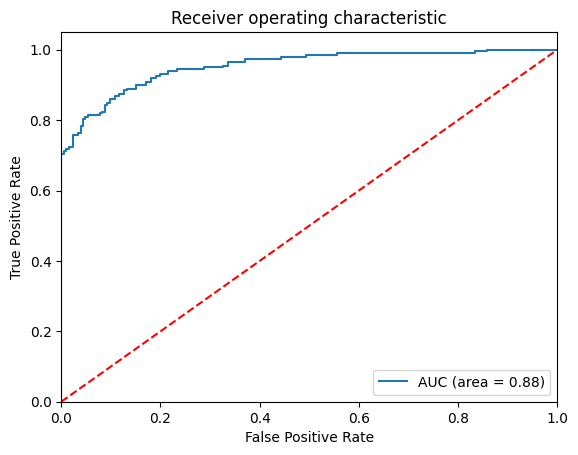

In [27]:
logit_roc_auc = roc_auc_score(y_train, model_LR.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, model_LR.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

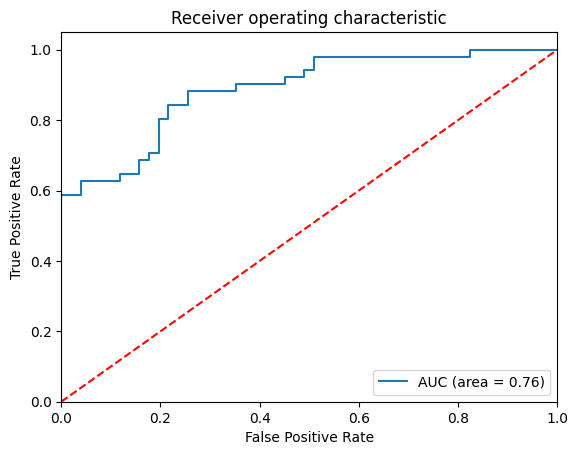

In [28]:
logit_roc_auc = roc_auc_score(y_test, model_LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Model Optimizasyonu —Grid Search Cross Validation—

In [29]:
model_LR_params = {"solver" : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [30]:
# Model Tanımlama

model_LR_CV = LogisticRegression(random_state = 1215)

In [31]:
model_LR_CVGS = GridSearchCV(model_LR_CV, 
                             model_LR_params,
                             cv = 5,
                             n_jobs = -1,
                             verbose = 2).fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [32]:
model_LR_CVGS.best_params_

{'solver': 'liblinear'}

In [33]:
# Bize verdigi en iyi parametre ile tekrar model olusturulur

best_model_LR_CVGS = LogisticRegression(solver = "liblinear", random_state = 1215).fit(X_train, y_train)

In [34]:
# Eğitim Seti Tahminlerini Elde Etme

best_model_LR_CVGS_pred_train = best_model_LR_CVGS.predict(X_train)

In [35]:
# Test Seti Tahminleri Elde Etme

best_model_LR_CVGS_pred_test = best_model_LR_CVGS.predict(X_test)

In [36]:
# Eğitim Seti Basarisi : 

accuracy_score(y_train, best_model_LR_CVGS_pred_train)

0.900990099009901

In [37]:
# Eğitim Seti Basarisi Hesaplama :

print(classification_report(y_train, best_model_LR_CVGS_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       205
           1       0.90      0.90      0.90       199

    accuracy                           0.90       404
   macro avg       0.90      0.90      0.90       404
weighted avg       0.90      0.90      0.90       404



In [38]:
# Test Seti Basarisi :

accuracy_score(y_test, best_model_LR_CVGS_pred_test)

0.8137254901960784

In [39]:
# Test Seti Basarisi Hesaplama :
print(classification_report(y_test, best_model_LR_CVGS_pred_test))


              precision    recall  f1-score   support

           0       0.76      0.92      0.83        51
           1       0.90      0.71      0.79        51

    accuracy                           0.81       102
   macro avg       0.83      0.81      0.81       102
weighted avg       0.83      0.81      0.81       102



##### Bu sonuçlar, gridsearch ile bulduğumuz parametrelerin, modelimizin performansının biraz daha arttigini gösteriyor. 
##### Ancak, başka parametreler veya başka modeller deneyerek daha iyi sonuçlar elde edebiliriz

#

### Random Forest

In [40]:
# model olusturma
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(random_state=1215).fit(X_train, y_train)

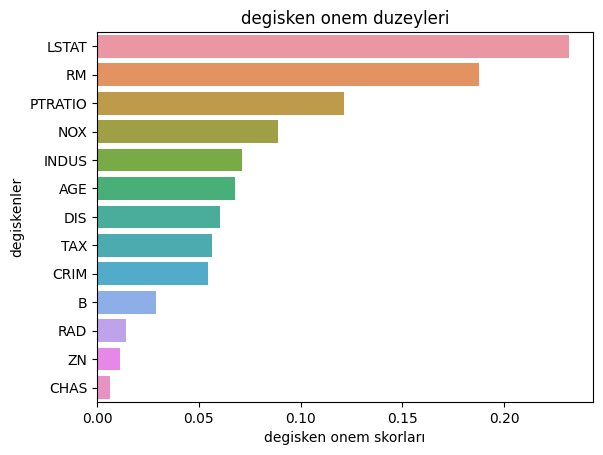

In [41]:
feature_imp= pd.Series(model_RF.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('degisken onem skorları')
plt.ylabel('degiskenler')
plt.title('degisken onem duzeyleri')
plt.show()

#### Tahmin ve Hata

In [42]:
# Eğitim Seti Tahmini
y_pred_model_RF_train = model_RF.predict(X_train)
y_pred_model_RF_train[0:10]

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [43]:
# Eğitim Seti Tahmini ---Olasılıkları---
y_prob_model_RF_train = model_RF.predict_proba(X_train)
y_prob_model_RF_train[0:10]

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.18, 0.82],
       [0.96, 0.04],
       [0.91, 0.09],
       [0.96, 0.04],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.06, 0.94],
       [0.  , 1.  ]])

In [44]:
# Test Seti Tahmini
y_pred_model_RF_test = model_RF.predict(X_test)
y_pred_model_RF_test[0:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [45]:
# Test Seti Tahmini ---Olasılıkları---
y_prob_model_RF_test = model_RF.predict_proba(X_test)
y_prob_model_RF_test[0:10]

array([[0.99, 0.01],
       [0.98, 0.02],
       [0.72, 0.28],
       [0.  , 1.  ],
       [0.06, 0.94],
       [1.  , 0.  ],
       [0.18, 0.82],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.92, 0.08]])

#### Eğitim seti degerleri :

In [46]:
# Eğitim Seti Hatası ---Confusion Matrix---
confusion_matrix(y_train, y_pred_model_RF_train)


array([[205,   0],
       [  0, 199]], dtype=int64)

0 ların tamamını 0, 1 lerin tamamını 1 olarak tahmin etti

In [47]:
# Eğitim Seti Başarısı ---Accurcy Score---
accuracy_score(y_train, y_pred_model_RF_train)


1.0

egitim setinin accuracy scoreu hatasız tahmin ettigi icin 1 gelir

In [48]:
# Eğitim Seti Hatası ---Classification Report---
print(classification_report(y_train, y_pred_model_RF_train))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       199

    accuracy                           1.00       404
   macro avg       1.00      1.00      1.00       404
weighted avg       1.00      1.00      1.00       404



#### Test seti degerleri :

In [49]:
# Test Seti Hatası ---Confusion Matrix---

confusion_matrix(y_test, y_pred_model_RF_test)

array([[48,  3],
       [13, 38]], dtype=int64)

In [50]:
# Test Seti Başarısı ---Accurcy Score---

accuracy_score(y_test, y_pred_model_RF_test)

0.8431372549019608

In [136]:
# Test Seti Hatası ---Classification Report---

print(classification_report(y_test, y_pred_model_RF_test))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        51
           1       0.93      0.75      0.83        51

    accuracy                           0.84       102
   macro avg       0.86      0.84      0.84       102
weighted avg       0.86      0.84      0.84       102



#### Accuracy değeri 0.84, yani modelimiz test kümesindeki  gözlemleri yüksek oranda doğru tahmin etmiş. 

### Model Optimizasyonu —Grid Search Cross Validation—


In [52]:
model_RF_params = {"n_estimators" : [100, 200, 500, 1000],
                    "max_features" : [3,5,7,8],
                    "min_samples_split" : [2,5,10,20]}


In [53]:
# Model Tanımlama

model_RF_CV = RandomForestClassifier(random_state = 1215)

model_RF_CVGS = GridSearchCV(model_RF_CV, 
                             model_RF_params,
                             cv = 10,
                             n_jobs = -1,
                             verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [54]:
model_RF_CVGS.best_params_


{'max_features': 3, 'min_samples_split': 20, 'n_estimators': 100}

In [55]:
# Bize verdigi en iyi parametre ile tekrar model olusturulur

best_model_RF_CVGS = RandomForestClassifier(max_features = 3,
                                            min_samples_split = 20,
                                            n_estimators = 100,
                                            random_state = 1215).fit(X_train, y_train)

In [56]:
# Eğitim Seti Tahminlerini Elde Etme

best_model_RF_CVGS_pred_train = best_model_RF_CVGS.predict(X_train)


In [57]:
# Test Seti Tahminleri Elde Etme

best_model_RF_CVGS_pred_test = best_model_RF_CVGS.predict(X_test)

In [58]:
# Eğitim Seti Basarisi : 

accuracy_score(y_train, best_model_RF_CVGS_pred_train)

0.948019801980198

In [59]:
# Eğitim Seti Basarisi Hesaplama :

print(classification_report(y_train, best_model_RF_CVGS_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       205
           1       0.97      0.92      0.95       199

    accuracy                           0.95       404
   macro avg       0.95      0.95      0.95       404
weighted avg       0.95      0.95      0.95       404



In [60]:
# Test Seti Basarisi :

accuracy_score(y_test, best_model_RF_CVGS_pred_test)

0.803921568627451

In [61]:
# Test Seti Basarisi Hesaplama :
print(classification_report(y_test, best_model_RF_CVGS_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        51
           1       0.88      0.71      0.78        51

    accuracy                           0.80       102
   macro avg       0.82      0.80      0.80       102
weighted avg       0.82      0.80      0.80       102



##### Bu sonuçlar, gridsearch ile bulduğumuz parametrelerin, modelimizin performansını dusurdugunu gösteriyor.
##### Bu, modelimizin zaten en iyi performansını gösterdiği anlamına gelebilir.
##### Ancak, başka parametreler veya başka modeller deneyerek daha iyi sonuçlar elde edebiliriz

#

### Support Vector Machine

In [62]:
# model olusturma & model uydurma

from sklearn.svm import SVC

model_SVC = SVC(kernel="linear",
                probability=True,
                random_state=1215).fit(X_train, y_train)

#### Tahmin ve Hata

In [63]:
# Eğitim Seti Tahmini
y_pred_model_SVC_train = model_SVC.predict(X_train)
y_pred_model_SVC_train[0:10]

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [64]:
# Eğitim Seti Tahmini ---Olasılıkları---
y_prob_model_SVC_train = model_SVC.predict_proba(X_train)
y_prob_model_SVC_train[0:10]

array([[0.03165997, 0.96834003],
       [0.00840215, 0.99159785],
       [0.51607013, 0.48392987],
       [0.88139304, 0.11860696],
       [0.75612104, 0.24387896],
       [0.91018661, 0.08981339],
       [0.99100867, 0.00899133],
       [0.99788879, 0.00211121],
       [0.42930613, 0.57069387],
       [0.02022951, 0.97977049]])

In [65]:
# Test Seti Tahmini
y_pred_model_SVC_test = model_SVC.predict(X_test)
y_pred_model_SVC_test[0:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [66]:
# Test Seti Tahmini ---Olasılıkları---
y_prob_model_SVC_test = model_SVC.predict_proba(X_test)
y_prob_model_SVC_test[0:10]

array([[0.99622893, 0.00377107],
       [0.8599923 , 0.1400077 ],
       [0.99155279, 0.00844721],
       [0.01377572, 0.98622428],
       [0.18804017, 0.81195983],
       [0.76234746, 0.23765254],
       [0.38929576, 0.61070424],
       [0.97348809, 0.02651191],
       [0.87086179, 0.12913821],
       [0.99733351, 0.00266649]])

#### Eğitim seti degerleri :

In [67]:
# Eğitim Seti Hatası ---Confusion Matrix---
confusion_matrix(y_train, y_pred_model_SVC_train)

array([[186,  19],
       [ 26, 173]], dtype=int64)

In [68]:
# Eğitim Seti Başarısı ---Accurcy Score---
accuracy_score(y_train, y_pred_model_SVC_train)

0.8886138613861386

In [69]:
# Eğitim Seti Hatası ---Classification Report---
print(classification_report(y_train, y_pred_model_SVC_train))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       205
           1       0.90      0.87      0.88       199

    accuracy                           0.89       404
   macro avg       0.89      0.89      0.89       404
weighted avg       0.89      0.89      0.89       404



#### Test seti degerleri :

In [70]:
# Test Seti Hatası ---Confusion Matrix---

confusion_matrix(y_test, y_pred_model_SVC_test)

array([[45,  6],
       [13, 38]], dtype=int64)

In [71]:
# Test Seti Başarısı ---Accurcy Score---

accuracy_score(y_test, y_pred_model_SVC_test)

0.8137254901960784

In [72]:
# Test Seti Hatası ---Classification Report---

print(classification_report(y_test, y_pred_model_SVC_test))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        51
           1       0.86      0.75      0.80        51

    accuracy                           0.81       102
   macro avg       0.82      0.81      0.81       102
weighted avg       0.82      0.81      0.81       102



#### Accuracy değeri 0.81, modelimiz test kümesindeki  gözlemleri yüksek oranda doğru tahmin etmiş. 

### Model Optimizasyonu —Grid Search Cross Validation—


In [73]:
model_SVC_params = {"C":np.arange(1,10),
                    "kernel":["linear", "rbf"]}

In [74]:
# Model Tanımlama

model_SVC_CV = SVC(probability=True, random_state = 1215)

In [75]:
model_SVC_CVGS = GridSearchCV(model_SVC_CV, 
                             model_SVC_params,
                             cv = 5,
                             n_jobs = -1,
                             verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [76]:
model_SVC_CVGS.best_params_

{'C': 2, 'kernel': 'linear'}

In [77]:
# Bize verdigi en iyi parametre ile tekrar model olusturulur

best_model_SVC_CVGS = SVC(C = 2, kernel = "linear", random_state = 1215).fit(X_train, y_train)

In [78]:
# Eğitim Seti Tahminlerini Elde Etme

best_model_SVC_CVGS_pred_train = best_model_SVC_CVGS.predict(X_train)

In [79]:
# Test Seti Tahminleri Elde Etme

best_model_SVC_CVGS_pred_test = best_model_SVC_CVGS.predict(X_test)

In [80]:
# Eğitim Seti Basarisi : 

accuracy_score(y_train, best_model_SVC_CVGS_pred_train)

0.8935643564356436

In [81]:
# Eğitim Seti Basarisi Hesaplama :

print(classification_report(y_train, best_model_SVC_CVGS_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       205
           1       0.91      0.87      0.89       199

    accuracy                           0.89       404
   macro avg       0.89      0.89      0.89       404
weighted avg       0.89      0.89      0.89       404



In [82]:
# Test Seti Basarisi :

accuracy_score(y_test, best_model_SVC_CVGS_pred_test)

0.8137254901960784

In [83]:
# Test Seti Basarisi Hesaplama :
print(classification_report(y_test, best_model_SVC_CVGS_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        51
           1       0.86      0.75      0.80        51

    accuracy                           0.81       102
   macro avg       0.82      0.81      0.81       102
weighted avg       0.82      0.81      0.81       102



##### Bu sonuçlar, gridsearch ile bulduğumuz parametrelerin, modelimizin performansını degistirmedigini gösteriyor.
##### Bu, modelimizin zaten en iyi performansını gösterdiği anlamına gelebilir.
##### Ancak, başka parametreler veya başka modeller deneyerek daha iyi sonuçlar elde edebiliriz

#

### Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(random_state=1215).fit(X_train, y_train)

In [85]:
feature_imp = pd.Series(model_DT.feature_importances_,
                        index= X_train.columns).sort_values(ascending=False)

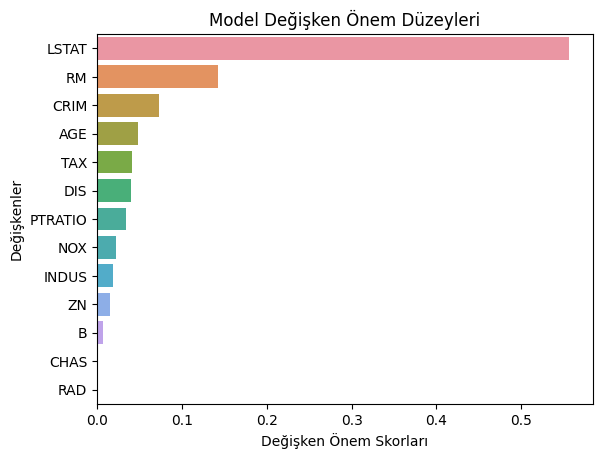

In [86]:
sns.barplot(x = feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Model Değişken Önem Düzeyleri")
plt.show()

#### Tahmin ve Hata

In [87]:
# Eğitim Seti Tahmini
y_pred_model_DT_train = model_DT.predict(X_train)
y_pred_model_DT_train[0:10]

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [88]:
# Eğitim Seti Tahmini ---Olasılıkları---
y_prob_model_DT_train = model_DT.predict_proba(X_train)
y_prob_model_DT_train[0:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [89]:
# Test Seti Tahmini
y_pred_model_DT_test = model_DT.predict(X_test)
y_pred_model_DT_test[0:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [90]:
# Test Seti Tahmini ---Olasılıkları---
y_prob_model_DT_test = model_DT.predict_proba(X_test)
y_prob_model_DT_test[0:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

#### Eğitim seti degerleri :

In [91]:
# Eğitim Seti Hatası ---Confusion Matrix---
confusion_matrix(y_train, y_pred_model_DT_train)

array([[205,   0],
       [  0, 199]], dtype=int64)

In [92]:
# Eğitim Seti Başarısı ---Accurcy Score---
accuracy_score(y_train, y_pred_model_DT_train)

1.0

In [93]:
# Eğitim Seti Hatası ---Classification Report---
print(classification_report(y_train, y_pred_model_DT_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       199

    accuracy                           1.00       404
   macro avg       1.00      1.00      1.00       404
weighted avg       1.00      1.00      1.00       404



#### Test seti degerleri :

In [94]:
# Test Seti Hatası ---Confusion Matrix---

confusion_matrix(y_test, y_pred_model_DT_test)

array([[42,  9],
       [10, 41]], dtype=int64)

In [95]:
# Test Seti Başarısı ---Accurcy Score---

accuracy_score(y_test, y_pred_model_DT_test)

0.8137254901960784

In [96]:
# Test Seti Hatası ---Classification Report---

print(classification_report(y_test, y_pred_model_DT_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82        51
           1       0.82      0.80      0.81        51

    accuracy                           0.81       102
   macro avg       0.81      0.81      0.81       102
weighted avg       0.81      0.81      0.81       102



#### Accuracy değeri 0.81, yani modelimiz test kümesindeki  gözlemleri yüksek oranda doğru tahmin etmiş. 

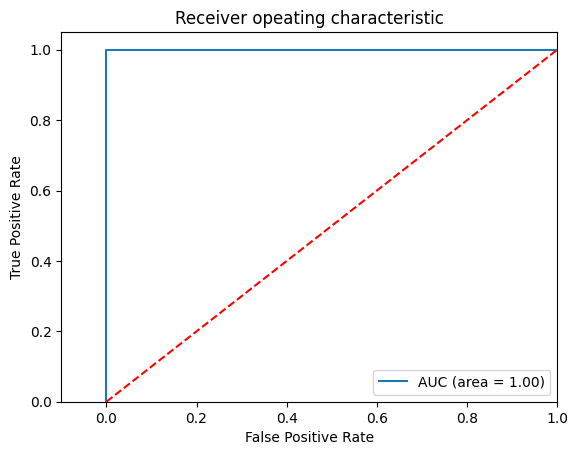

In [130]:
# roc egrisi
logit_roc_auc= roc_auc_score(y_train, y_pred_model_DT_train)
fpr, tpr, thresholds= roc_curve(y_train, model_DT.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver opeating characteristic')
plt.legend(loc="lower right")
plt.savefig('log_ROC')
plt.show()

# altında kalan alan 1 e yakınlaştıkça dogru tahmin etme yüksekligimiz artar biz 1e yakın olmasını isteriz


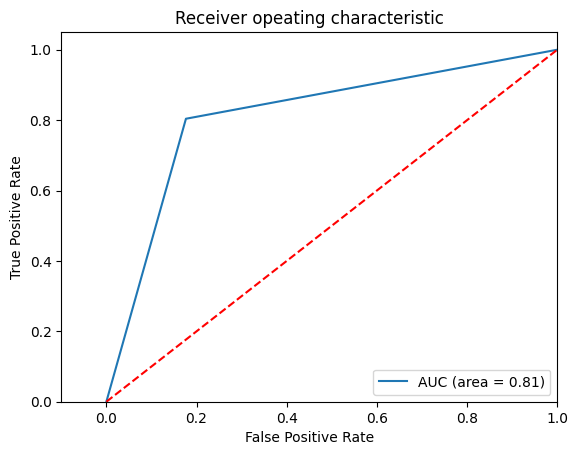

In [131]:
# roc egrisi
logit_roc_auc= roc_auc_score(y_test, y_pred_model_DT_test)
fpr, tpr, thresholds= roc_curve(y_test, model_DT.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver opeating characteristic')
plt.legend(loc="lower right")
plt.savefig('log_ROC')
plt.show()

### Model Optimizasyonu —Grid Search Cross Validation—


In [97]:
model_DT_params = {"max_depth" : [1,3,5,8,10],
                   "min_samples_split" : [2,3,5,10,20,50]}

In [98]:
# Model Tanımlama

model_DT_CV = DecisionTreeClassifier(random_state = 1215)

model_DT_CVGS = GridSearchCV(model_DT_CV, 
                             model_DT_params,
                             cv = 5,
                             n_jobs = -1,
                             verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [99]:
model_DT_CVGS.best_params_

{'max_depth': 3, 'min_samples_split': 50}

In [100]:
# Bize verdigi en iyi parametre ile tekrar model olusturulur

best_model_DT_CVGS = DecisionTreeClassifier(max_depth = 3,
                                            min_samples_split = 50,
                                            random_state = 1215).fit(X_train, y_train)

In [101]:
# Eğitim Seti Tahminlerini Elde Etme

best_model_DT_CVGS_pred_train = best_model_DT_CVGS.predict(X_train)

In [102]:
# Test Seti Tahminleri Elde Etme

best_model_DT_CVGS_pred_test = best_model_DT_CVGS.predict(X_test)

In [103]:
# Eğitim Seti Basarisi : 

accuracy_score(y_train, best_model_DT_CVGS_pred_train)

0.8910891089108911

In [104]:
# Eğitim Seti Basarisi Hesaplama :

print(classification_report(y_train, best_model_DT_CVGS_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       205
           1       0.96      0.81      0.88       199

    accuracy                           0.89       404
   macro avg       0.90      0.89      0.89       404
weighted avg       0.90      0.89      0.89       404



In [105]:
# Test Seti Basarisi :

accuracy_score(y_test, best_model_DT_CVGS_pred_test)

0.7745098039215687

In [106]:
# Test Seti Basarisi Hesaplama :
print(classification_report(y_test, best_model_DT_CVGS_pred_test))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        51
           1       0.91      0.61      0.73        51

    accuracy                           0.77       102
   macro avg       0.81      0.77      0.77       102
weighted avg       0.81      0.77      0.77       102



##### Bu sonuçlar, gridsearch ile bulduğumuz parametrelerin, modelimizin performansını dusurdugunu gösteriyor.
##### Bu, modelimizin zaten en iyi performansını gösterdiği anlamına gelebilir.
##### Ancak, başka parametreler veya başka modeller deneyerek daha iyi sonuçlar elde edebiliriz

#

### K Nearest Neighbor

In [139]:
from sklearn.neighbors import KNeighborsRegressor
model_KNN = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_model_KNN = model_KNN.predict(X_test)
accuracy_score(y_test, y_pred_model_KNN.round())

0.8137254901960784

#### Accuracy değeri 0.81, modelimiz test kümesindeki  gözlemleri yüksek oranda doğru tahmin etmiş. 

In [108]:
## Grid Search kullanarak en iyi K degerini belirleyelim
k_params = {"n_neighbors": [3, 5, 7, 9, 11, 13, 15, 17, 19, 21], "metric": ["euclidean", "manhattan", "minkowski"], "weights": ["uniform", "distance"]}
KNN_arg = KNeighborsRegressor()
model_KNN = GridSearchCV(KNN_arg, k_params, cv=5) 
model_KNN.fit(X_train, y_train)
model_KNN.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [124]:
# GridSearch ile bulduğumuz en iyi parametreler ile tekrar model oluşturuyoruz.
best_model_KNN = KNeighborsRegressor(n_neighbors = 7 , metric = "manhattan", weights = "distance").fit(X_train, y_train)
best_model_KNN_pred_test = best_model_KNN.predict(X_test)
accuracy_score(y_test, best_model_KNN_pred_test.round())

0.8333333333333334

##### Bu accuracy_score degeri, gridsearch ile bulduğumuz parametrelerin, modelimizin performansını artirdigini gösteriyor.
##### Ancak, başka parametreler deneyerek daha iyi sonuçlar elde edebiliriz

#